In [1]:
import itertools
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp

# Generate data

<AxesSubplot:>

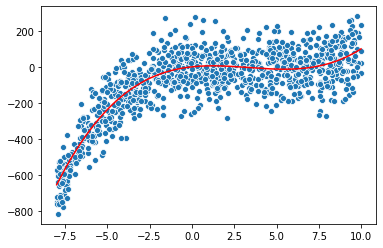

In [92]:
X = np.random.uniform(-8, 10, 1000)
noise = np.random.normal(0,100,1000)
true_function = 10*X -5*X**2 + 0.5*(X**3)
y=true_function+noise
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=true_function, color='r')